# Data Manipulation
### Merging Data to Understand the Relationship between Drug Legalization and Violent Crime

There are 2 data sources used for this analysis - Arrests in 2009 by county, and population information for each county in 2009. The data is merged on the county name, and the resulting dataframe is then used for the analysis.


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Step 1: Reading the data - Arrests in California in 2009 by County

In [2]:
cal_arr = pd.read_csv(
    "https://github.com/nickeubank/practicaldatascience/raw/master/Example_Data/ca/ca_arrests_2009.csv"
)

In [3]:
cal_arr.sample(5)

,Unnamed: 0,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL
5,1687,Colusa County,58,50,28,7,132,275,917,0
3,1685,Butte County,641,602,542,34,429,2248,9026,1
14,1696,Kern County,4290,4384,3320,202,2975,15171,31828,524
31,1713,Plumas County,100,44,104,2,68,318,867,13
13,1695,Inyo County,81,44,39,3,38,205,851,1


In [4]:
print("Number of rows and columns: ", cal_arr.shape)
print("Column Datatypes", cal_arr.dtypes)

Number of rows and columns:  (58, 10)
Column Datatypes Unnamed: 0     int64
COUNTY        object
VIOLENT        int64
PROPERTY       int64
F_DRUGOFF      int64
F_SEXOFF       int64
F_ALLOTHER     int64
F_TOTAL        int64
M_TOTAL        int64
S_TOTAL        int64
dtype: object


In [5]:
nhgis_pop = pd.read_csv(
    "https://github.com/nickeubank/practicaldatascience/raw/master/Example_Data/ca/nhgis_county_populations.csv"
)

In [6]:
nhgis_pop.sample(5)

,Unnamed: 0,YEAR,STATE,COUNTY,total_population
1236,1236,2005-2009,Michigan,Arenac County,16561
683,683,2005-2009,Illinois,Stephenson County,46821
342,342,2005-2009,Florida,Hamilton County,14228
2274,2274,2005-2009,Pennsylvania,Huntingdon County,45479
5570,2349,2013-2017,South Carolina,Marion County,31765


In [7]:
print("Number of rows and columns: ", nhgis_pop.shape)
print("Column Datatypes", nhgis_pop.dtypes)

Number of rows and columns:  (6441, 5)
Column Datatypes Unnamed: 0           int64
YEAR                object
STATE               object
COUNTY              object
total_population     int64
dtype: object


In [8]:
nhgis_pop["year_2009"] = nhgis_pop["YEAR"].str[-4:]

In [9]:
nhgis_pop_updated = nhgis_pop.copy()
nhgis_pop_updated.loc[
    nhgis_pop_updated["COUNTY"] == "DelNorte County", "COUNTY"
] = "Del Norte County"
nhgis_pop_updated.loc[
    nhgis_pop_updated["COUNTY"] == "Injo County", "COUNTY"
] = "Inyo County"

In [10]:
nhgis_merged = pd.merge(
    cal_arr,
    nhgis_pop_updated[
        (nhgis_pop_updated["STATE"] == "California")
        & (nhgis_pop_updated["year_2009"] == "2009")
    ],
    left_on="COUNTY",
    right_on="COUNTY",
    validate="1:1",
    how="outer",
    indicator=True,
)

In [11]:
nhgis_merged.sample(5)

,Unnamed: 0_x,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,Unnamed: 0_y,YEAR,STATE,total_population,year_2009,_merge
29,1711,Orange County,6145,7853,7524,579,4049,26150,66320,1620,215,2005-2009,California,2976831,2009,both
10,1692,Glenn County,104,78,104,14,133,433,1283,73,196,2005-2009,California,27891,2009,both
35,1717,San Bernardino County,8474,10799,8793,720,4916,33702,56648,1119,221,2005-2009,California,1986635,2009,both
25,1707,Mono County,52,38,38,1,30,159,521,0,211,2005-2009,California,12925,2009,both
16,1698,Lake County,349,204,271,17,303,1144,3095,13,202,2005-2009,California,64756,2009,both


In [12]:
# creating columns for violent arrest rate and drug arrest rate
nhgis_merged["violent_arrest_rate_2009"] = (
    nhgis_merged["VIOLENT"] / nhgis_merged["total_population"]
)
nhgis_merged["drug_arrest_rate_2009"] = (
    nhgis_merged["F_DRUGOFF"] / nhgis_merged["total_population"]
)

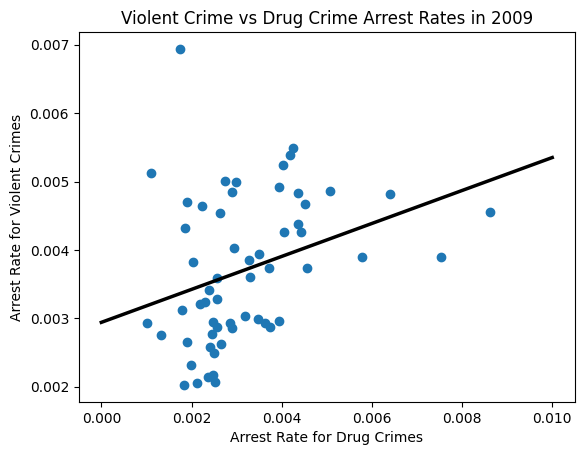

In [13]:
plt.scatter(data=nhgis_merged, x="drug_arrest_rate_2009", y="violent_arrest_rate_2009")
b, a = np.polyfit(
    nhgis_merged["drug_arrest_rate_2009"],
    nhgis_merged["violent_arrest_rate_2009"],
    deg=1,
)
xseq = np.linspace(0, 0.01, num=10)
plt.xlabel("Arrest Rate for Drug Crimes")
plt.ylabel("Arrest Rate for Violent Crimes")
plt.title("Violent Crime vs Drug Crime Arrest Rates in 2009")
plt.plot(xseq, a + b * xseq, color="k", lw=2.5)